#Import the Necessary Libraries




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV File

In [4]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()   #displays the top 5 rows

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

# Preprocessing the Data

In [5]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [6]:
# Number of columns and rows in a dataframe
df.shape

(270, 14)

In [7]:
# checking if any missing values are there?
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
# checking if any duplicate values present?
format(len(df[df.duplicated()]))

'0'

After the completion of data preprocessing step, we found there are no missing values, no duplicate values in our dataset

In [9]:
#Seperating the numeric variable and categorical variable
name = df.columns
n_var = ['Age', 'BP', 'Cholesterol', 'Max HR', 'Heart Disease']
c_var = [item for item in name if item not in n_var]

n_var_data = df[df.columns & n_var]
n_var_data.describe() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  


Age          BP  Cholesterol      Max HR
count  270.000000  270.000000   270.000000  270.000000
mean    54.433333  131.344444   249.659259  149.677778
std      9.109067   17.861608    51.686237   23.165717
min     29.000000   94.000000   126.000000   71.000000
25%     48.000000  120.000000   213.000000  133.000000
50%     55.000000  130.000000   245.000000  153.500000
75%     61.000000  140.000000   280.000000  166.000000
max     77.000000  200.000000   564.000000  202.000000

In [11]:
#finding the correlation in the numerical variable 
n_var_data.corr()

Age        BP  Cholesterol    Max HR
Age          1.000000  0.273053     0.220056 -0.402215
BP           0.273053  1.000000     0.173019 -0.039136
Cholesterol  0.220056  0.173019     1.000000 -0.018739
Max HR      -0.402215 -0.039136    -0.018739  1.000000

# Data Visualization


In [12]:
import seaborn as sns

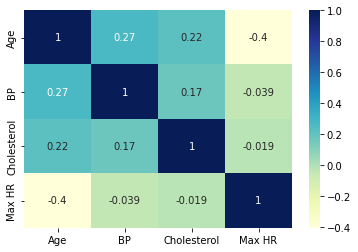

In [13]:
sns.heatmap(n_var_data.corr(), cmap="YlGnBu", annot=True)

From the above visualization we found that there are i) no outliers ii)signigicant correlation among variables

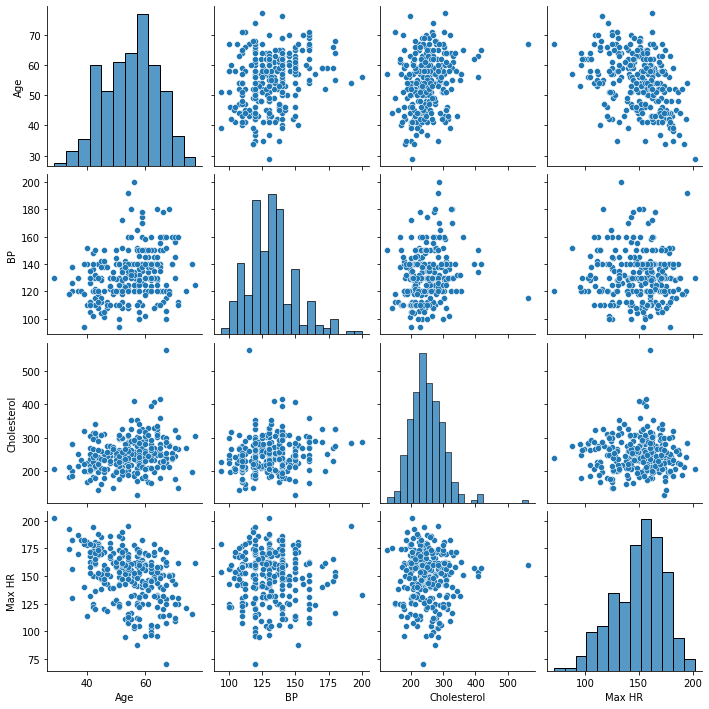

In [30]:
sns.pairplot(n_var_data)

No distinct pattern is observed in scatterplot

In [17]:
n_var_data[n_var_data['Cholesterol'] > 500]

Age   BP  Cholesterol  Max HR Heart Disease
1   67  115          564     160       Absence

A potential outlier, with cholesterol value greater than 500 is checked and observed to be usual

In [19]:
sns.pairplot(n_var_data, hue = 'Heart Disease')

# Building and Evaluating the Model

In this step, we develop the models and evaluate their performance. 

In [20]:
#Segregrating dataframe in independent and target variable
x = df.drop(['Heart Disease'], axis = 1)  #Independent Variables
y = df['Heart Disease']                   #Target Variables

In [31]:
#Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

We first split the dataset into train and test dataset in the ration 80:20. We used linear regression as our model and fitted the train dataset. The coefficient of determination or R square is obtained as printed.

In [23]:
# Logistic regression with train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = LogisticRegression()
model.fit(X_train, y_train)
r_sqr = model.score(x, y)
print(f"coefficient of determination: {r_sqr}")

coefficient of determination: 0.8592592592592593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Feature Importance
Feature importance is the process of selecting the features having significant impact to the target variable.

Here, "Heart Disease" is a target variable, which is converted to numeric form using label encoder.

In [24]:
### Label encoding the target variable

from sklearn.preprocessing import LabelEncoder
x_train_enc = X_train

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)

Permutation importance method is applied using LogisticRegression as ML algorithms to determine the importance of features. 

In [25]:
# Feature Importance using permutation method

from sklearn.inspection import permutation_importance

#perform permutation importance
model.fit(x_train_enc, y_train_enc)

results = permutation_importance(model, x_train_enc, y_train_enc, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01574
Feature: 1, Score: 0.01667
Feature: 2, Score: 0.02407
Feature: 3, Score: 0.00093
Feature: 4, Score: -0.00370
Feature: 5, Score: -0.00185
Feature: 6, Score: -0.00741
Feature: 7, Score: 0.06204
Feature: 8, Score: 0.00833
Feature: 9, Score: 0.00926
Feature: 10, Score: 0.00741
Feature: 11, Score: 0.08333
Feature: 12, Score: 0.04722


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The importance value is displayed in graph for better visualization.

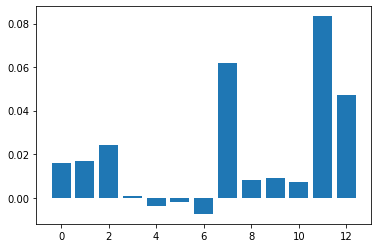

In [26]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

Four variables are identified with the impact score higher than 0.02.

In [28]:
selected_feature = ['Sex','Max HR', 'Number of vessels fluro', 'Thallium']
print(selected_feature)

['Sex', 'Max HR', 'Number of vessels fluro', 'Thallium']


# Retesting the model with the selected Feature
Here, we will check whether the performance of model with only selected variable which is better than previous model with all variables.

In [32]:
data = df[df.columns & selected_feature]

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33)
model = LogisticRegression()
model.fit(X_train, y_train)
r_sq = model.score(data, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8185185185185185


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.





*   The accuracy score of model with the selected variables is not significantly different than all variables.
*   The number of variables is reduced from 13 to 4 with the feature selection

The number of variables is reduced from 13 to 4 with the feature selection







In [36]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [37]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, data, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.796296 (0.053029)
LDA: 0.800000 (0.052899)
KNN: 0.740741 (0.075903)
NB: 0.788889 (0.062085)
SVM: 0.696296 (0.054433)


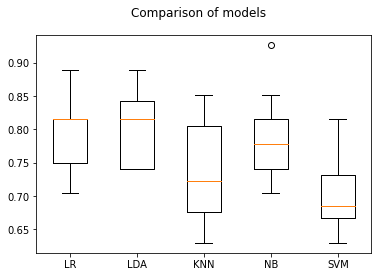

In [40]:
# boxplot comparison of all the models
fig = plt.figure()
fig.suptitle('Comparison of models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()